In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

## Helper

### Enemies

In [3]:
from dataclasses import dataclass

@dataclass
class Creature:
    hp: int
    armor: tuple[int, int]
    accuracy: int
    evasion: int
    damage: tuple[int, int]
    name: str

class Creatures:
    rat = Creature(8,(0,1), 8, 2, (1,4), "rat")
    snake = Creature(4,(0,0), 10, 25, (1,4), "snake")
    gnoll = Creature(12,(0,2), 10, 4, (1,6), "gnoll")
    crab = Creature(15,(0,4), 12, 5, (1,7), "crab")
    slime = Creature(20,(0,0), 12, 5, (2,5), "slime")
    flies = Creature(50,(0,0), 10, 5, (1,4), "swarm of flies")
    skeleton = Creature(25,(0,5), 12, 9, (2,10), "skeleton")
    thief = Creature(20,(0,3), 12, 12, (1,10), "crazy thief")
    necromancer = Creature(40,(0,5), 12, 14, (2,10), "necromancer")
    guard = Creature(40,(0,7), 12, 10, (4,12), "guard")
    dm100 = Creature(20,(0,4), 11, 8, (2,8), "DM100")
    bat = Creature(30,(0,4), 16, 15, (5,18), "vampire bat")
    brute = Creature(40,(0,8), 20, 15, (5,25), "gnoll brute")
    shaman = Creature(35,(0,6), 18, 15, (5,10), "gnoll shaman")
    spider = Creature(50,(0,6), 20, 14, (10,20), "cave spider")
    dm200 = Creature(80,(0,8), 25, 8, (10,25), "DM200")
    ghoul = Creature(45,(0,4), 24, 20, (16,22),"dwarven ghoul")
    elemental = Creature(65,(0,5), 25, 20, (20,25), "elemental")
    warlock = Creature(70,(0,8), 25, 18, (16,22), "dwarf warlock")
    monk = Creature(68,(0,2), 30, 30, (12,25), "dwarf monk")
    golem = Creature(120,(0,12), 28, 15, (25,30), "golem")
    succubus = Creature(80,(0,10), 40, 25, (25,30), "succubus")
    eye = Creature(100,(0,10), 30, 20, (20,30), "evil eye")
    scorpio = Creature(110,(0,16), 36, 24, (30,40), "scorpio")
    demon = Creature(60,(0,4), 30, 22, (15,25), "demon ripper")
    goo = Creature(120,(0,2), 10, 8, (1,8), "Goo")
    goo_enraged = Creature(120,(0,2), 15, 8 * 1.5, (1,12), "Goo (enraged)")
    tengu = Creature(250,(0,5), 20, 15, (6,12), "Tengu")
    dm300 = Creature(400,(0,10), 20, 15, (15,25), "DM300")
    dk = Creature(450,(0,10), 26, 22, (15,25), "Dwarf King")
    fist = Creature(300,(0,15), 36, 20, (18,36), "Yog Fist")


### Equipment

In [80]:
from dataclasses import dataclass

class ArmorAugment:
    NONE = (0, 0)
    DEFENSE = (-2, 1)
    EVASION = (2, -1)

class WeaponAugment:
    SPEED = (0.7, 2/3)
    DAMAGE = (1.5, 5/3)
    NONE = (1, 1)

@dataclass
class ArmorInstance:
    base_defense: tuple[int, int]
    upgrade: int
    augment: ArmorAugment

# base damage of armor
class Armors:
    cloth = (0, 2)
    leather = (0, 3)
    mail = (0, 4)
    scale = (0, 5)
    plate = (0, 6)

@dataclass
class Weapon:
    base_damage: tuple[int, int]
    damage_scaling: tuple[int, int]
    strength: int
    name: str
    accuracy_multiplier: float = 1
    delay: float = 1

@dataclass
class WeaponInstance:
    weapon: Weapon
    upgrade: int = 0
    augment: WeaponAugment = WeaponAugment.NONE
    

class Weapons:
    worn_shortsword = Weapon((1,10), (1,2), 10, 'worn shortsword')
    dagger = Weapon((1,8), (1,2), 10,  'dagger')
    studded_gloves = Weapon((1,5), (1,1), 10,  'studded gloves', delay=0.5)
    rapier = Weapon((1,8), (1,2), 10,  'rapier')
    cudgel = Weapon((1,8), (1,2), 10,  'cudgel', accuracy_multiplier=1.4)
    staff = Weapon((1,6), (1,2), 10,  "mage's staff")
    shortsword = Weapon((2,15), (1,3), 12, 'shortsword')
    handaxe = Weapon((2,12), (1,3), 12, 'hand axe', accuracy_multiplier=1.32)
    spear = Weapon((2,20), (1,4), 12, 'spear', delay=1.5)
    dirk = Weapon((2,12), (1,3), 12, 'dirk')
    quarterstaff = Weapon((2,12), 12, (1,3), 'quarterstaff')
    sickle = Weapon((2,20), (1,3), 12, 'sickle', accuracy_multiplier=0.68)
    pickaxe = Weapon((2,15), (1,3), 14, 'pickaxe')
    sword = Weapon((3,20), (1,4), 14, 'sword')
    mace = Weapon((3,16), (1,4), 14, 'mace', accuracy_multiplier=1.28)
    scimitar = Weapon((3,16), (1,4), 14, 'scimitar', delay=0.8)
    sai = Weapon((3,10), (1,2), 14, 'sai', delay=0.5)
    round_shield = Weapon((3,12), (1,2), 14, 'round shield')
    whip = Weapon((3,15), (1,3), 14, 'whip')
    longsword = Weapon((4,25), (1,5), 16, 'longsword')
    battleaxe = Weapon((4,20), (1,5), 16, 'battleaxe', accuracy_multiplier=1.24)
    flail = Weapon((4,35), (1,8), 16, 'flail', accuracy_multiplier=0.8)
    assassins_blade = Weapon((4,20), (1,5), 16, "assassin's blade")
    runic_blade = Weapon((4,20), (1,6), 16, 'runic blade')
    crossbow = Weapon((4,20), (1,4), 16, 'crossbow')
    katana = Weapon((4,20), (1,5), 16, 'katana')
    greatsword = Weapon((5,30), (1,6), 18, 'greatsword')
    warhammer = Weapon((5,24), (1,6), 18, 'war hammer', accuracy_multiplier=1.2)
    glaive = Weapon((5,40), (1,8), 18, 'glaive',delay=1.5)
    greataxe = Weapon((5,45), (1,6), 20, 'great axe')
    greatshield = Weapon((5,18), (1,3), 18, 'greatshield')
    stone_gauntlet = Weapon((5,15), (1,3), 18, 'stone gauntlet', delay=0.5)
    war_scythe = Weapon((5,40), (1,6), 18, 'war scythe', accuracy_multiplier=0.8)



### Helper functions

In [78]:
def calc_hit_rate(accuracy, evasion):
    if evasion >= accuracy:
        return accuracy / (2 * evasion)
    else:
        return 1 - evasion / (2 * accuracy)

def calc_percent_change(original, new):
    return (new - original)/original * 100

def calc_final_damage(damage, defense):
    return max(0, damage - defense)

def calc_strength_reduction(upgrade):
    return math.floor((1/2)*(-1 + math.sqrt(1 + 8 * upgrade)))

def calc_defense_interval_fima(base_armor, armor_level, armor_augment):
    base_armor_max = base_armor[1]
    max_defense = base_armor_max + armor_level + armor_augment[1] * (armor_level + 2)
    return (base_armor[0], max_defense)

def calc_final_evasion(base_evasion, armor_level, armor_augment, evasion_multiplier):
    return base_evasion * evasion_multiplier + armor_augment[0] * (armor_level + 2)

def calc_damage_interval(weapon: WeaponInstance):
    damage_interval = np.array(weapon.weapon.base_damage)
    damage_scaling = np.array(weapon.weapon.damage_scaling)
    upgrade_level = weapon.upgrade
    augment_factor = weapon.augment[0]
    return np.round((damage_interval + damage_scaling * upgrade_level) * augment_factor)



def triangular_discrete(low, high):
    # min + (int)((Float() + Float()) * (max - min + 1) / 2f);
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    return low + math.floor((u1 + u2) * (high - low + 1) / 2)

def roll_ranges(ranges):
    return sum(triangular_discrete(x[0], x[1]) for x in ranges)

def roll_damage_taken(defense_intervals, damage_intervals, hit_chance):
    defense_roll = roll_ranges(defense_intervals)
    damage_roll = roll_ranges(damage_intervals)
    evasion_roll = 1 if random.uniform(0, 1) < hit_chance else 0
    return evasion_roll * calc_final_damage(damage_roll, defense_roll)

def simulate_damage(defense_intervals, damage_intervals, hit_chance, num_iterations):
    data_points = []
    for _ in range(num_iterations):
        damage = roll_damage_taken(defense_intervals, damage_intervals, hit_chance)
        data_points.append(damage)
    return data_points


In [76]:
def f(k):
    return math.floor((1/2)*(-1 + math.sqrt(1 + 8*k)))

f(6)

3

## Augmentation simulation

### Compare augmentations

In [6]:
# configure variables here
creature = Creatures.ghoul
armor = Armors.plate
armor_level = 1
hero_level = 18
evasion_multiplier = 1
num_simulations = 100000
extra_defenses = [(0,7)]

armor_unaug = ArmorInstance(armor, armor_level, ArmorAugment.NONE)
armor_defense = ArmorInstance(armor, armor_level, ArmorAugment.DEFENSE)
armor_evasion = ArmorInstance(armor, armor_level, ArmorAugment.EVASION)

def simulate_damage_taken(accuracy, damage_interval, armor, hero_level, evasion_multiplier, num_simulations, extra_defenses):
    base_armor = armor.base_defense
    augmentation = armor.augment
    armor_level = armor.upgrade
    base_evasion = hero_level + 4
    final_evasion = calc_final_evasion(base_evasion, armor_level, augmentation, evasion_multiplier)
    final_defense_interval = calc_defense_interval_fima(base_armor, armor_level, augmentation)
    hit_chance = calc_hit_rate(accuracy, final_evasion)
    data = simulate_damage([final_defense_interval] + extra_defenses, [damage_interval], hit_chance, num_simulations)
    return data

accuracy = creature.accuracy
damage_interval = creature.damage
base_armor = (armor[0], armor[1])

data_unaug = simulate_damage_taken(accuracy, damage_interval, armor_unaug, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data_defense = simulate_damage_taken(accuracy, damage_interval, armor_defense, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data_evasion = simulate_damage_taken(accuracy, damage_interval, armor_evasion, hero_level, evasion_multiplier, num_simulations, extra_defenses)

avg_damage_unaug = np.average(data_unaug)
avg_damage_defense = np.average(data_defense)
avg_damage_evasion = np.average(data_evasion)

var_damage_unaug = np.var(data_unaug)
var_damage_defense = np.var(data_defense)
var_damage_evasion = np.var(data_evasion)

percent_change_defense = calc_percent_change(avg_damage_unaug, avg_damage_defense)
percent_change_evasion = calc_percent_change(avg_damage_unaug, avg_damage_evasion)

print(f"Average damage unaugmented {avg_damage_unaug}")
print(f"Average damage defense {avg_damage_defense}")
print(f"Average damage evasion {avg_damage_evasion}")
print(f"Variance damage unaugmented {var_damage_unaug}")
print(f"Variance damage defense {var_damage_defense}")
print(f"Variance damage evasion {var_damage_evasion}")
print(f"Defense augment percent change: {percent_change_defense}")
print(f"Evasion augment percent change: {percent_change_evasion}")

Average damage unaugmented 6.52319
Average damage defense 6.99118
Average damage evasion 5.78088
Variance damage unaugmented 39.98206222390001
Variance damage defense 31.2834622076
Variance damage evasion 47.219286425600004
Defense augment percent change: 7.174250635042063
Evasion augment percent change: -11.379555094976537


### Compare armors

In [7]:
# configure variables here
creature = Creatures.bat
armor1 = ArmorInstance(Armors.leather, 1, ArmorAugment.EVASION)
armor2 = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
hero_level = 13
evasion_multiplier = 1
num_simulations = 100000
extra_defenses = [(0,7)]

data1 = simulate_damage_taken(accuracy, damage_interval, armor1, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data2 = simulate_damage_taken(accuracy, damage_interval, armor2, hero_level, evasion_multiplier, num_simulations, extra_defenses)

avg_damage1 = np.average(data1)
avg_damage2 = np.average(data2)

print(f"Average damage of armor 1: {avg_damage1}")
print(f"Average damage of armor 2: {avg_damage2}")
print(f"Armor {1 if avg_damage1 < avg_damage2 else 2} is better")

Average damage of armor 1: 7.78769
Average damage of armor 2: 8.07213
Armor 1 is better


### Plot defense

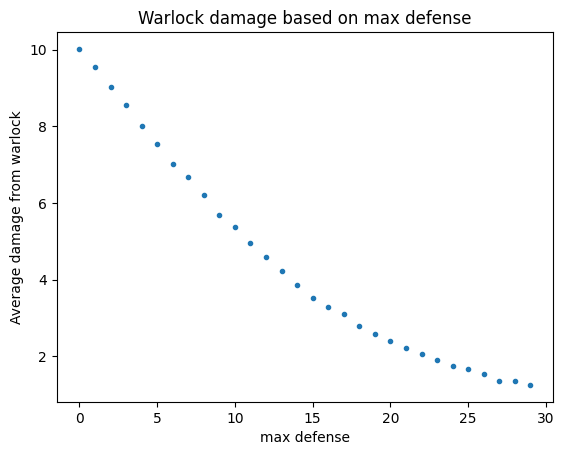

In [8]:
damage_interval = Creatures.warlock.damage
num_simulations= 10000
num_plots = 30
bonus_defense = (0, 18) #8 19

average_damage = []

for max_defense in range(num_plots):
    data_points = simulate_damage([(0, max_defense), bonus_defense], [damage_interval], 1.0, num_simulations)
    average_damage.append(np.average(data_points))

plt.title("Warlock damage based on max defense")
plt.xlabel("max defense")
plt.ylabel("Average damage from warlock")
plt.plot(range(num_plots), average_damage, '.')

## Clover simulations

In [9]:
def calc_clover_proc_chance(level):
    return 0.25 * (level + 1)

def get_clover_damage(damage_ranges, clover_level):
    normal_damage = roll_ranges(damage_ranges)
    min_damage = sum([x[0] for x in damage_ranges])
    max_damage = sum([x[1] for x in damage_ranges])
    proc_chance = calc_clover_proc_chance(clover_level)
    return random.choices([normal_damage, min_damage, max_damage], weights=[1-proc_chance, 2/5 * proc_chance, 3/5 * proc_chance])[0]

def simulate_fight(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense):
    curr_hp = hp
    num_hits = 0
    while(curr_hp > 0):
        damage_roll = get_clover_damage((damage_range, (0, extra_strength)), clover_level)
        (defense_low, defense_high) = defense_range
        defense_roll = 0 if ignore_defense else triangular_discrete(defense_low, defense_high)
        curr_hp -= calc_final_damage(damage_roll, defense_roll)
        num_hits += 1
    return num_hits

def simulate_n_fights(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense, num_simulations):
    result = []
    for _ in range(num_simulations):
        num_hits = simulate_fight(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense)
        result.append(num_hits)
    return result

def simulate_clover_efficacy(enemy, damage_range, extra_strength, num_simulations, ignore_defense):
    data_points_clover0 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 0, ignore_defense, num_simulations)
    data_points_clover1 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 1, ignore_defense, num_simulations)
    data_points_clover2 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 2, ignore_defense, num_simulations)
    data_points_clover3 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 3, ignore_defense, num_simulations)
    data_points_normal = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, -1, ignore_defense, num_simulations)

    avg_normal = np.average(data_points_normal)
    avg0 = np.average(data_points_clover0)
    avg1 = np.average(data_points_clover1)
    avg2 = np.average(data_points_clover2)
    avg3 = np.average(data_points_clover3)

    var_normal = np.var(data_points_normal)
    var0 = np.var(data_points_clover0)
    var1 = np.var(data_points_clover1)
    var2 = np.var(data_points_clover2)
    var3 = np.var(data_points_clover3)
    
    
    print(f'Num simulations: {num_simulations}')
    print('Average number of hits')
    print(f'Normal {avg_normal}')
    print(f'Clover +0 {avg0}')
    print(f'Clover +1 {avg1}')
    print(f'Clover +2 {avg2}')
    print(f'Clover +3 {avg3}')
    print(f'Variance:')
    print(f'Normal {var_normal}')
    print(f'Clover +0 {var0}')
    print(f'Clover +1 {var1}')
    print(f'Clover +2 {var2}')
    print(f'Clover +3 {var3}')
    print(f'% change:')
    print(f'Clover +0 {calc_percent_change(avg_normal, avg0)}')
    print(f'Clover +1 {calc_percent_change(avg_normal, avg1)}')
    print(f'Clover +2 {calc_percent_change(avg_normal, avg2)}')
    print(f'Clover +3 {calc_percent_change(avg_normal, avg3)}')
    

In [ ]:
# Config variables
weapon = WeaponInstance(Weapons.worn_shortsword, WeaponAugment.SPEED, 1)
damage_range = calc_damage_interval(weapon)
extra_strength = 3
enemy = Creatures.skeleton
num_simulations = 10000
ignore_defense = False
simulate_clover_efficacy(enemy, damage_range, extra_strength, num_simulations, False)

[ 1.7        11.33333333]
Num simulations: 10000
Average number of hits
Normal 5.1408
Clover +0 4.909
Clover +1 4.692
Clover +2 4.534
Clover +3 4.4994
Variance:
Normal 1.1189753599999999
Clover +0 1.873319
Clover +1 2.4119360000000003
Clover +2 2.634444
Clover +3 3.09539964
% change:
Clover +0 -4.50902583255524
Clover +1 -8.73015873015872
Clover +2 -11.803610333022094
Clover +3 -12.476657329598506


In [34]:
weapon = WeaponInstance(Weapons.glaive, 7, WeaponAugment.SPEED)
damage_range = calc_damage_interval(weapon)
print(damage_range)

[ 8. 67.]


### Clover tests

#### Average improvement and Variance

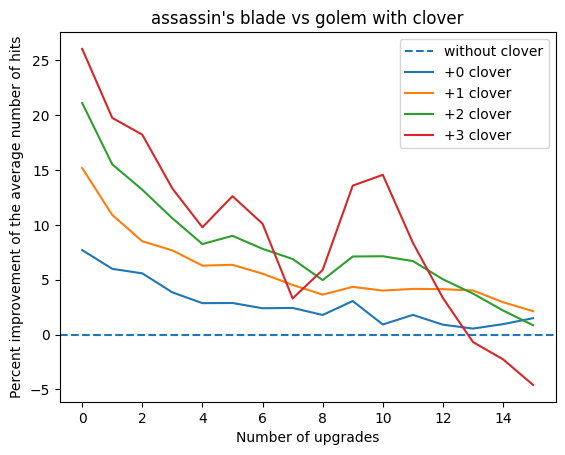

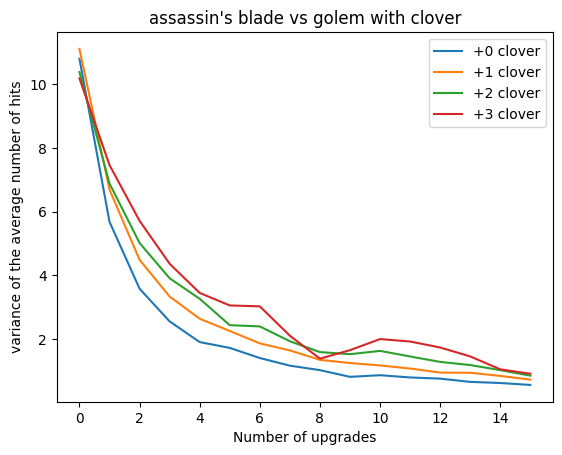

In [44]:
enemy = Creatures.golem
weapon = WeaponInstance(Weapons.assassins_blade, 0, WeaponAugment.NONE)
num_simulations = 2000
num_upgrades = 15
ignore_defense = False

averages_clover0 = []
averages_clover1 = []
averages_clover2 = []
averages_clover3 = []
vars_clover0 = []
vars_clover1 = []
vars_clover2 = []
vars_clover3 = []

for i in range(num_upgrades + 1):
    weapon.upgrade = i
    damage_range = calc_damage_interval(weapon)

    data_points_clover0 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 0, ignore_defense, num_simulations)
    data_points_clover1 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 1, ignore_defense, num_simulations)
    data_points_clover2 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 2, ignore_defense, num_simulations)
    data_points_clover3 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 3, ignore_defense, num_simulations)
    data_points_normal = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, -1, ignore_defense, num_simulations)

    average_clover0 = np.average(data_points_clover0)
    average_clover1 = np.average(data_points_clover1)
    average_clover2 = np.average(data_points_clover2)
    average_clover3 = np.average(data_points_clover3)
    average_normal = np.average(data_points_normal)

    var_clover0 = np.var(data_points_clover0)
    var_clover1 = np.var(data_points_clover1)
    var_clover2 = np.var(data_points_clover2)
    var_clover3 = np.var(data_points_clover3)
    var_normal = np.var(data_points_normal)

    averages_clover0.append(-calc_percent_change(average_normal, average_clover0))
    averages_clover1.append(-calc_percent_change(average_normal, average_clover1))
    averages_clover2.append(-calc_percent_change(average_normal, average_clover2))
    averages_clover3.append(-calc_percent_change(average_normal, average_clover3))

    vars_clover0.append(var_clover0)
    vars_clover1.append(var_clover1)
    vars_clover2.append(var_clover2)
    vars_clover3.append(var_clover3)

augment_text = ''
if(weapon.augment == WeaponAugment.DAMAGE):
    augment_text = ' (damage)'
elif(weapon.augment == WeaponAugment.SPEED):
    augment_text = ' (speed)'

plt.title(f"{weapon.weapon.name}{augment_text} vs {enemy.name} with clover")
plt.xlabel("Number of upgrades")
plt.ylabel("Percent improvement of the average number of hits")
plt.axhline(y=0, linestyle='--', label='without clover')
plt.plot(range(num_upgrades + 1), averages_clover0, label='+0 clover')
plt.plot(range(num_upgrades + 1), averages_clover1, label='+1 clover')
plt.plot(range(num_upgrades + 1), averages_clover2, label='+2 clover')
plt.plot(range(num_upgrades + 1), averages_clover3, label='+3 clover')
plt.legend()
plt.show()

plt.title(f"{weapon.weapon.name}{augment_text} vs {enemy.name} with clover")
plt.xlabel("Number of upgrades")
plt.ylabel("variance of the average number of hits")

plt.plot(range(num_upgrades + 1), vars_clover0, label='+0 clover')
plt.plot(range(num_upgrades + 1), vars_clover1, label='+1 clover')
plt.plot(range(num_upgrades + 1), vars_clover2, label='+2 clover')
plt.plot(range(num_upgrades + 1), vars_clover3, label='+3 clover')
plt.legend()
plt.show()




### Weapon comparisons

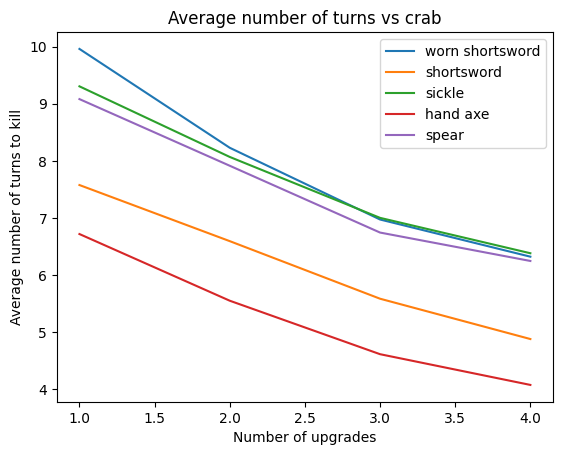

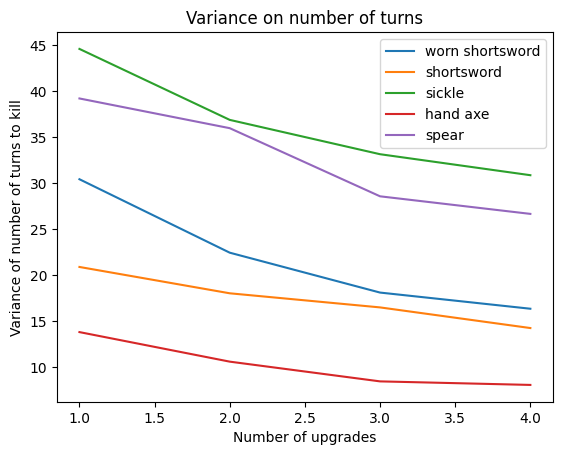

In [ ]:
enemy = Creatures.crab
weapons = [
    WeaponInstance(Weapons.worn_shortsword),
    WeaponInstance(Weapons.shortsword),
    WeaponInstance(Weapons.sickle),
    WeaponInstance(Weapons.handaxe),
    WeaponInstance(Weapons.spear),
]

calc_strength_reduction
hero_level = 3
strength = 11
num_simulations = 5000
num_upgrades: int = 4
ignore_defense = False

hero_accuracy = hero_level + 9

num_turns_data = []

for weapon in weapons:
    results = []
    hit_rate = calc_hit_rate(hero_accuracy * weapon.weapon.accuracy_multiplier , enemy.evasion)
    for i in range(1, num_upgrades + 1):
        data_points = []
        weapon.upgrade = i
        for _ in range(num_simulations):
            enemy_hp = enemy.hp
            num_turns = 0
            while(enemy_hp > 0):
                damage = roll_damage_taken(
                    [enemy.armor],
                    [
                        calc_damage_interval(weapon),
                        (0, strength - weapon.weapon.strength + calc_strength_reduction(i))
                    ],
                    hit_rate)
                enemy_hp -= damage
                num_turns += weapon.augment[1] * weapon.weapon.delay
            data_points.append(num_turns)
        results.append(data_points)

    num_turns_data.append(results)

plt.title(f'Average number of turns vs {enemy.name}')
plt.xlabel("Number of upgrades")
plt.ylabel("Average number of turns to kill")
for i in range(len(weapons)):
    plt.plot(range(1, num_upgrades + 1), [np.average(x) for x in num_turns_data[i]], label=weapons[i].weapon.name)
plt.legend()
plt.show()

plt.title('Variance on number of turns')
plt.xlabel("Number of upgrades")
plt.ylabel("Variance of number of turns to kill")
for i in range(len(weapons)):
    plt.plot(range(1, num_upgrades + 1), [np.var(x) for x in num_turns_data[i]], label=weapons[i].weapon.name)
plt.legend()
plt.show()
        

